# Chapter 3 Classification:

MNIST dataset 70,000 images of handwritten digits

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='Documents')

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Datasets loaded by Scikit-learn often have a similar dictionary structure with 

- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array with labels

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Each Image has 784 features as each image is 28 by 28 pixels and each pixel has an intensity from 0 (white) to 255 (black). Displaying an image has been done using matplotlib and reshaping. data = the data for that particular entry
target = the label

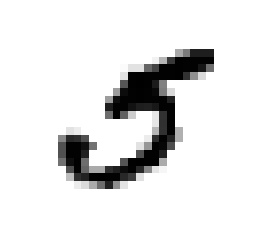

3.0

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

y[20000]

Set aside a training and testing set, in the case of Mnist the first 60,000 are training and the last 10,000 are test. As we are working with non-time series data it makes sense to shuffle the data

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


Training a Binary Classifier

Training a binary classifier to classify 5 or not 5 using a stochastic gradient descent

Using Skikit-learns SGD classifier

In [18]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

Using the predict method, an entry can be passed in and the result returned as true or false

In [25]:
sgd_clf.predict([some_digit])

array([ True])

Performance Measures

Starting with cross validation

K-fold cross validation means splitting the training set into K folds then making predictions and evaluating them on each fold using a model trained from the remaining folds.

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

array([0.9241 , 0.94435, 0.94435])

The classifier can retun an accuracy of 90% since saying every number is not 5 will be right 90% of the time, as only 10% of data points are 5s. Accuracy is not always the best measure of correctness

In [28]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90755, 0.90915, 0.91225])

# Confusion Matrix

Much better way to evaluate the perfromance of a classifier is the confusion matrix

In [31]:
from sklearn.model_selection import cross_val_predict

#cross_val_predict perfroms k folds cross validation but instead of retruning evaluation
#scores it returns predicitions for each test fold. = Clean prediction for each instance in training set

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[51445,  3134],
       [  610,  4811]])

# Precision and Recall

precision = the positive predicitions of the classifier

$$precision=TP/(TP+FP)$$

recall = ratio of positive instances that are correctly identified by the classifier (also called sensitivity)

$$recall = TP/(TP+FN)$$

In [34]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.6055380742605412
0.8874746356760745


Combining the precision and recall into the F1 score which is the harmonic mean of the two. Harmonic mean gives more weight to low values and will therefore only get a high F1 score if both recall and precisison are high

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7198862786173873

Precisison and recall tradeoff

SGD calssifier works by computing a score based on a decision function and if that score is greater than a threshold it assigns the instance to the positive class, else the negative class.

SKlearn does not let you set threshold directly but the decision scores can be accessed

In [36]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([48894.30302149])

In [38]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

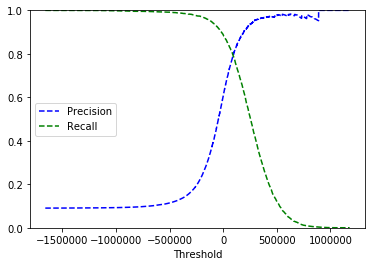

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# ROC curve

receiver operating characteristics - plots the true positive rate(recall) against the false positive rate (negative instances that are incorrectly identified as positive)

TNR (True negative rate) -  ratio of negative instances that are correclty identified as negative (Specificity)

Hence the ROC curve plots sensitivity(recall) vs 1-specificity

To PLot the ROC curve, the TPR, FPR need to be calculated for various threshold values (this can be done using the roc_curve function

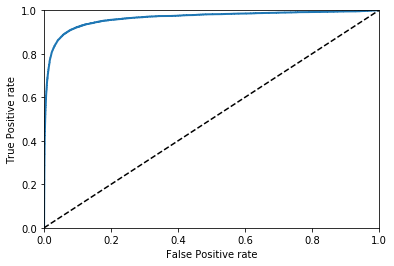

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

Computing the AUC (area under curve) the better the classifier the closer that figure is to 1

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9642726453231877

Comparing ROC curves

going to train a RandomForestClassifier so that the ROC curves can be compared. The RFC doesnt have a decision_function but it does have a dict_probability which is an array containing one row perinstance and a column per class. Each contains the probability the instance belongs to the class

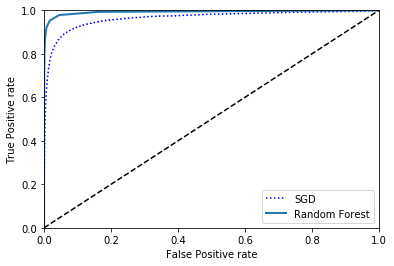

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:,1] # score = probability of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

# Multiclass Classification

multiclass or multinominal classifiers distinguish between more than 2 classes

It is possible to create a system using binary classifiers (SVM or Linear classifiers) to identify the digits 0 - 9 by training 10 classifiers each targetting a particular digit. Then you examine the decsision score from each classifier and select the class with the highest score. This is called one versus all (OvA) or one versus the rest.

A second strategy is to train a binary classifier for pairs of digits, ie one to distinguish 0 and 1, one for 0 and 2, one for 1 and 2 etc. This is known as a One verse One startegy (OvO). If there are N classes you need;

$$N*(N-1)/2$$

For Minst this means 45 classifiers. The main advantage of this appraoch is each classifier needs only to be trained on the two classes that it must distinguish.

Some Algorthims scale poorly with the size of the training set so for these OvO is prefered since its faster to train many classifiers on small training sets. For most binary classifiers however OvA is prefered

Scikit learn detects when you try use a binary classifier for multi-class task and automatically runs Ova(except for SVM)

In the first example SCikit learn ran 10 binary classifiers and selected the class with the highest score. The second example now returns the 10 scores

In [48]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [49]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-175504.8465511 , -473592.61753993, -362023.33062637,
        -230578.33150468, -561235.73282157,   48894.30302149,
        -699585.68193671, -306747.40868639, -470359.5939151 ,
        -637001.84258933]])

When a classifier is trained, it sotores the list of target classes in its classes_ attribute ordered by value. In this case the index of each class convinelty matches the class itself. (E.g. the class at index 5 happens to be the class 5) This wont always be the case

In [50]:
np.argmax(some_digit_scores)

5

In [52]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [53]:
sgd_clf.classes_[5]

5.0

Forcing Scikit learn to use a OvO or OvA. Create an instance and pass a binary classifier to its construtor. The code below creates a multi-class classifier using the OvO strategy based on SGD classifier:

In [55]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_)

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

45

Training a RandomForest Classifier, this time it wont have to run OvA or OvO becuase random forest classifiers can directly classify instances into multiple classes. You can get predict_proba() to get a list of the probabilities that the classifier assigned for each instance

In [57]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

forest_clf.predict_proba([some_digit])


array([[0.1, 0. , 0. , 0. , 0. , 0.8, 0.1, 0. , 0. , 0. ]])

In [58]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

array([0.84328134, 0.83034152, 0.87263089])

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

array([0.91036793, 0.90769538, 0.9106866 ])

# Error Analysis

Usually the process would be to explore other options
- data prep options
- multiple models
- finetuning hyper params

Here it is assumed a promising model has been found and is looking to be improved

Firstt looking at the confusion matrix

In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/TobySherwood/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/U

array([[5748,    2,   19,   10,   12,   31,   48,   10,   41,    2],
       [   2, 6484,   45,   28,    6,   39,    6,   12,  109,   11],
       [  57,   37, 5330,  105,   88,   25,   86,   58,  155,   17],
       [  47,   40,  136, 5346,    2,  223,   32,   62,  144,   99],
       [  21,   28,   38,    7, 5348,   10,   46,   37,   83,  224],
       [  74,   42,   44,  183,   74, 4596,   99,   29,  179,  101],
       [  40,   25,   46,    2,   47,   97, 5613,    5,   43,    0],
       [  23,   21,   67,   30,   49,   11,    5, 5811,   17,  231],
       [  58,  148,   71,  157,   14,  161,   50,   33, 5017,  142],
       [  49,   31,   20,   83,  163,   40,    2,  194,   85, 5282]])

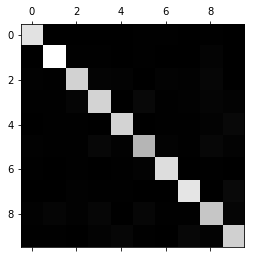

In [64]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Focus on the erros, Firsat by dividing the value in the confusion matrix by the number of images in the coresponding class so that error rates can be comapred instead of absolute number of errors (which would make abundent classes look unfairly bad)

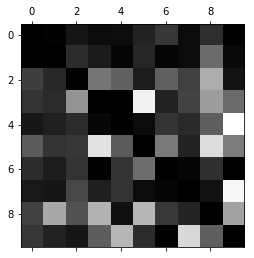

In [66]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

# Filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)


Errors can now clearly be seen

Rows represent actual classes, while columns represent predicted classes

bright rows (eg 8 and 9) mean that these are often confused with other digits

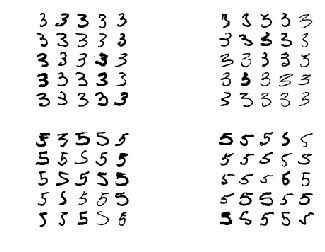

In [69]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred ==cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred ==cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred ==cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred ==cl_b)]

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

In [68]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")